**Created by Berkay Alan**

**Non-Linear Models - Regression | Support Vector Regression(SVR)**

**2 August 2021**

**Content**


- Support Vector Regression(SVR) (Theory - Model- Tuning)
- Non-Linear Support Vector Regression(SVR) (Theory - Model- Tuning)

**<span style='color:Blue'> Check out My Github for other Regression Models  </span>**

Github Repository Including:
    
- K - Nearest Neighbors(KNN) (Theory - Model- Tuning)
- Regression(Decision) Trees (CART) (Theory - Model- Tuning)
- Ensemble Learning - Bagged Trees(Bagging) (Theory - Model- Tuning)
- Ensemble Learning - Random Forests (Theory - Model- Tuning)
- Gradient Boosting Machines(GBM)  (Theory - Model- Tuning)
- Light Gradient Boosting Machines(LGBM)  (Theory - Model- Tuning)
- XGBoost(Extreme Gradient Boosting)  (Theory - Model- Tuning)
- Catboost  (Theory - Model- Tuning)
  
Check it out: https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Non-Linear%20Models%20-%20Regression.ipynb

**For more Tutorial:** https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Support Vector Regression Tutorial for Machine Learning**](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)

- [**An Introduction to Support Vector Regression (SVR)**](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2)

- [**SVM: Difference between Linear and Non-Linear Models**](https://www.aitude.com/svm-difference-between-linear-and-non-linear-models/)

- [**Kernel Functions-Introduction to SVM Kernel & Examples**](https://data-flair.training/blogs/svm-kernel-functions/)

- [**Understanding Confusion Matrix**](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

## Importing Libraries

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.svm import SVR

In [ ]:
import time

## Support Vector Regression(SVR)

### Theory

Support Vector Regression gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. The objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, **ϵ (epsilon)**. We can tune epsilon to gain the desired accuracy of our model.

Illustrative example:

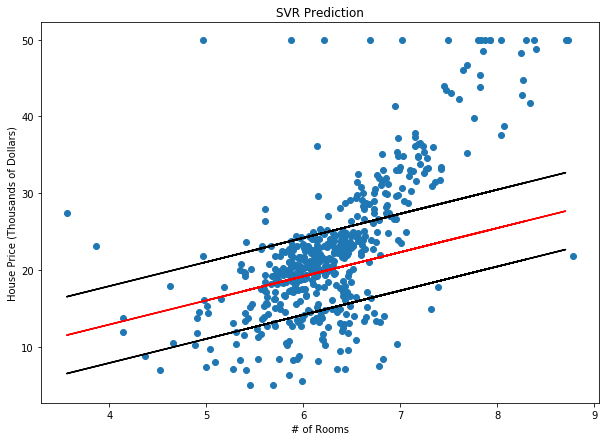

Photo is cited by:https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

As we can see, we have data points that are outside the epsilon in sensitive tube. We care about the error for them and they will be measured as distance between the point and the tube. As such, we need to account for the possibility of errors that are larger than ϵ. We can do this with slack variables.

The concept of **slack variables** is simple: for any value that falls outside of ϵ, we can denote its deviation from the margin as ξ.

That's the formula to minimise:

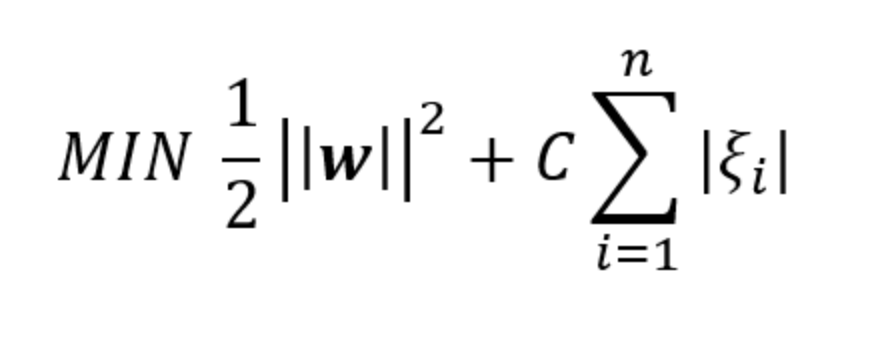

Photo is cited by: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

We now have an additional **C** hyperparameter that we can tune. As C increases, our tolerance for points outside of ϵ also increases. As C approaches 0, the tolerance approaches 0 and the equation collapses into the simplified one.

### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
X_train

In [ ]:
X_test[:10]

In [ ]:
svr_model = SVR("linear").fit(X_train,y_train)

In [ ]:
svr_model

We can write Support vector regression in linear regression form as below:

In [ ]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

Let's control this formula.

In [ ]:
print("Manual Calculation: ",svr_model.intercept_[0]+(svr_model.coef_[0][0]*X_train["Hits"][0:1].item()),
      "\nOutput of Model",svr_model.predict(X_train[0:1]).item())

In [ ]:
y_pred=svr_model.predict(X_train)

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,c="r")
plt.title("Train Errors")
plt.show()

### Prediction

In [ ]:
svr_model

In [ ]:
y_pred=svr_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=svr_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

### Model Tuning

In [ ]:
svr_model

In [ ]:
svr_parameters = {"C": np.arange(0.1,3,0.1)}
svr_cv_model= GridSearchCV(svr_model,svr_parameters,cv=15).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR("linear",
                C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [ ]:
svr_tuned

In [ ]:
y_pred=svr_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=svr_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

We did all process with only **Hits** column. We can also try with all columns. But it takes more time nearly 30 min.

## Non-Linear Support Vector Regression(SVR)

### Theory

When we cannot separate data with a straight line we use Non – Linear SVM. In this, we have **Kernel functions**. They transform non-linear spaces into linear spaces. It transforms data into another dimension so that the data can be classified.

It transforms two variables x and y into three variables along with z. Therefore, the data have plotted from 2-D space to 3-D space. Now we can easily classify the data by drawi

### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
SVR_Radial_Basis = SVR("rbf").fit(X_train,y_train)

### Prediction

In [ ]:
SVR_Radial_Basis

In [ ]:
y_pred=SVR_Radial_Basis.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=SVR_Radial_Basis.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

### Model Tuning

In [ ]:
SVR_Radial_Basis

In [ ]:
svr_parameters = {"C": np.arange(0.2,10,0.1)}
svr_cv_model= GridSearchCV(SVR_Radial_Basis,svr_parameters,cv=15).fit(X_train,y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR("rbf",
                C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [ ]:
svr_tuned

In [ ]:
y_pred=svr_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=svr_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)